# Импорт библиотек

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import graphviz as gv
from kneed import KneeLocator
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay, silhouette_score
from scipy.stats import norm
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.mixture import GaussianMixture
import scipy.cluster.hierarchy as sch
from scipy.cluster import hierarchy
from scipy.spatial.distance import pdist
from sklearn.metrics import accuracy_score
from sklearn.neighbors import NearestNeighbors
from sklearn import metrics
from sklearn.metrics import silhouette_score,calinski_harabasz_score,davies_bouldin_score
from sklearn.cluster import AgglomerativeClustering
%matplotlib inline

In [2]:
df = pd.read_csv('/Users/rita/Desktop/МО/3 и 4 лабы/smoking_driking_dataset.csv')
df.dtypes

sex                  object
age                   int64
height                int64
weight                int64
waistline           float64
sight_left          float64
sight_right         float64
hear_left           float64
hear_right          float64
SBP                 float64
DBP                 float64
BLDS                float64
tot_chole           float64
HDL_chole           float64
LDL_chole           float64
triglyceride        float64
hemoglobin          float64
urine_protein       float64
serum_creatinine    float64
SGOT_AST            float64
SGOT_ALT            float64
gamma_GTP           float64
SMK_stat_type_cd    float64
DRK_YN               object
dtype: object

In [3]:
df.head(5)

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,Male,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,...,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,Y
1,Male,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,...,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,N
2,Male,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,...,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,N
3,Male,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,...,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,N
4,Male,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,...,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,N


In [4]:
# Описание столбцов 
'''
Sex - пол
age	- возраст
height - рост
weight - вес
sight_left - зрение(слева)
sight_right - зрение(справа)
hear_left -	слух слева, 1 (нормальный), 2(ненормальный)
hear_right - слух справа, 1 (нормальный), 2(ненормальный)
SBP - систолическое артериальное давление
DBP - диастолическое артериальное давление
BLDS -  БПК или ФСГ (уровень глюкозы в крови натощак)
tot_chole - общий холестерин
HDL_chole -	холестерин ЛПВП
LDL_chole -	холестерин ЛПНП
triglyceride - триглицериды
hemoglobin - гемоглобин
urine_protein -	белок в моче, 1(-), 2(+/-), 3(+1), 4(+2), 5(+3), 6(+4)
serum_creatinine - креатинин сыворотки (крови)
SGOT_AST - SGOT(глутамат-оксалоацетаттрансаминаза) AST(аспартаттрансаминаза)
SGOT_ALT - АЛТ(аланиновая трансаминаза)
gamma_GTP -	y-глутамилтранспептидаза
SMK_stat_type_cd - состояние курения, 1(никогда), 2(раньше курил, но бросил), 3 (все еще курю)
DRK_YN - Пьющий или нет
'''

'\nSex - пол\nage\t- возраст\nheight - рост\nweight - вес\nsight_left - зрение(слева)\nsight_right - зрение(справа)\nhear_left -\tслух слева, 1 (нормальный), 2(ненормальный)\nhear_right - слух справа, 1 (нормальный), 2(ненормальный)\nSBP - систолическое артериальное давление\nDBP - диастолическое артериальное давление\nBLDS -  БПК или ФСГ (уровень глюкозы в крови натощак)\ntot_chole - общий холестерин\nHDL_chole -\tхолестерин ЛПВП\nLDL_chole -\tхолестерин ЛПНП\ntriglyceride - триглицериды\nhemoglobin - гемоглобин\nurine_protein -\tбелок в моче, 1(-), 2(+/-), 3(+1), 4(+2), 5(+3), 6(+4)\nserum_creatinine - креатинин сыворотки (крови)\nSGOT_AST - SGOT(глутамат-оксалоацетаттрансаминаза) AST(аспартаттрансаминаза)\nSGOT_ALT - АЛТ(аланиновая трансаминаза)\ngamma_GTP -\ty-глутамилтранспептидаза\nSMK_stat_type_cd - состояние курения, 1(никогда), 2(раньше курил, но бросил), 3 (все еще курю)\nDRK_YN - Пьющий или нет\n'

# Проверка на дубликаты с последующим удалением

In [5]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)
df = df.dropna()
df = df.drop_duplicates()
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (26, 24)
number of duplicate rows:  (0, 24)


# Преобразование данных
### Замена 
    Male -> 1|Female -> 0

    Y -> 1|N -> 0

In [6]:
df_copy = pd.get_dummies(df[['sex', 'DRK_YN']])

transformed_df = df.join(df_copy)

transformed_df = transformed_df[:10000]
len(transformed_df)

10000

### Удаление лишних столбцов

In [7]:
transformed_df.drop(['sex', 'DRK_YN','sex_Female', 'DRK_YN_N', 'hear_left', 
                     'hear_right', 'urine_protein', 'sight_right', 'sight_left'], 
                    axis=1, inplace=True)
transformed_df=transformed_df.rename(columns={"sex_Male": "sex", "DRK_YN_Y": "DRK_YN"})
transformed_df.drop(['DRK_YN'], axis=1, inplace=True)
transformed_df["sex"] = transformed_df["sex"].astype(int)
smk_df = transformed_df['SMK_stat_type_cd']
smk_df.replace(1, 0, inplace=True)
smk_df.replace(2, 1, inplace=True)
smk_df.replace(3, 2, inplace=True)
transformed_df.drop(['SMK_stat_type_cd'], axis=1, inplace=True)
transformed_df = pd.concat([transformed_df, smk_df], axis=1, join='inner')
display(transformed_df)

,age,height,weight,waistline,SBP,DBP,BLDS,tot_chole,HDL_chole,LDL_chole,triglyceride,hemoglobin,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,sex,SMK_stat_type_cd
0,35,170,75,90.0,120.0,80.0,99.0,193.0,48.0,126.0,92.0,17.1,1.0,21.0,35.0,40.0,1,0.0
1,30,180,80,89.0,130.0,82.0,106.0,228.0,55.0,148.0,121.0,15.8,0.9,20.0,36.0,27.0,1,2.0
2,40,165,75,91.0,120.0,70.0,98.0,136.0,41.0,74.0,104.0,15.8,0.9,47.0,32.0,68.0,1,0.0
3,50,175,80,91.0,145.0,87.0,95.0,201.0,76.0,104.0,106.0,17.6,1.1,29.0,34.0,18.0,1,0.0
4,50,165,60,80.0,138.0,82.0,101.0,199.0,61.0,117.0,104.0,13.8,0.8,19.0,12.0,25.0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,30,185,70,80.0,117.0,75.0,77.0,196.0,78.0,108.0,48.0,16.0,0.9,18.0,14.0,17.0,1,0.0
9996,40,175,90,106.0,138.0,88.0,97.0,168.0,41.0,97.0,146.0,16.4,0.9,39.0,100.0,187.0,1,2.0
9997,60,155,50,77.3,121.0,68.0,88.0,196.0,54.0,89.0,263.0,13.2,0.6,19.0,19.0,14.0,0,0.0
9998,45,165,65,77.1,118.0,68.0,87.0,261.0,79.0,138.0,221.0,12.6,0.8,20.0,12.0,12.0,0,0.0


In [8]:
transformed_df.shape
Q1 = transformed_df.quantile(0.25)
Q3 = transformed_df.quantile(0.75)
IQR = Q3 - Q1
transformed_df = transformed_df[~((transformed_df < (Q1 - 1.5 * IQR)) 
                                  |(transformed_df > (Q3 + 1.5 * IQR))).any(axis=1)]
transformed_df.shape

(7203, 18)

# Построение тепловой карты

<Axes: >

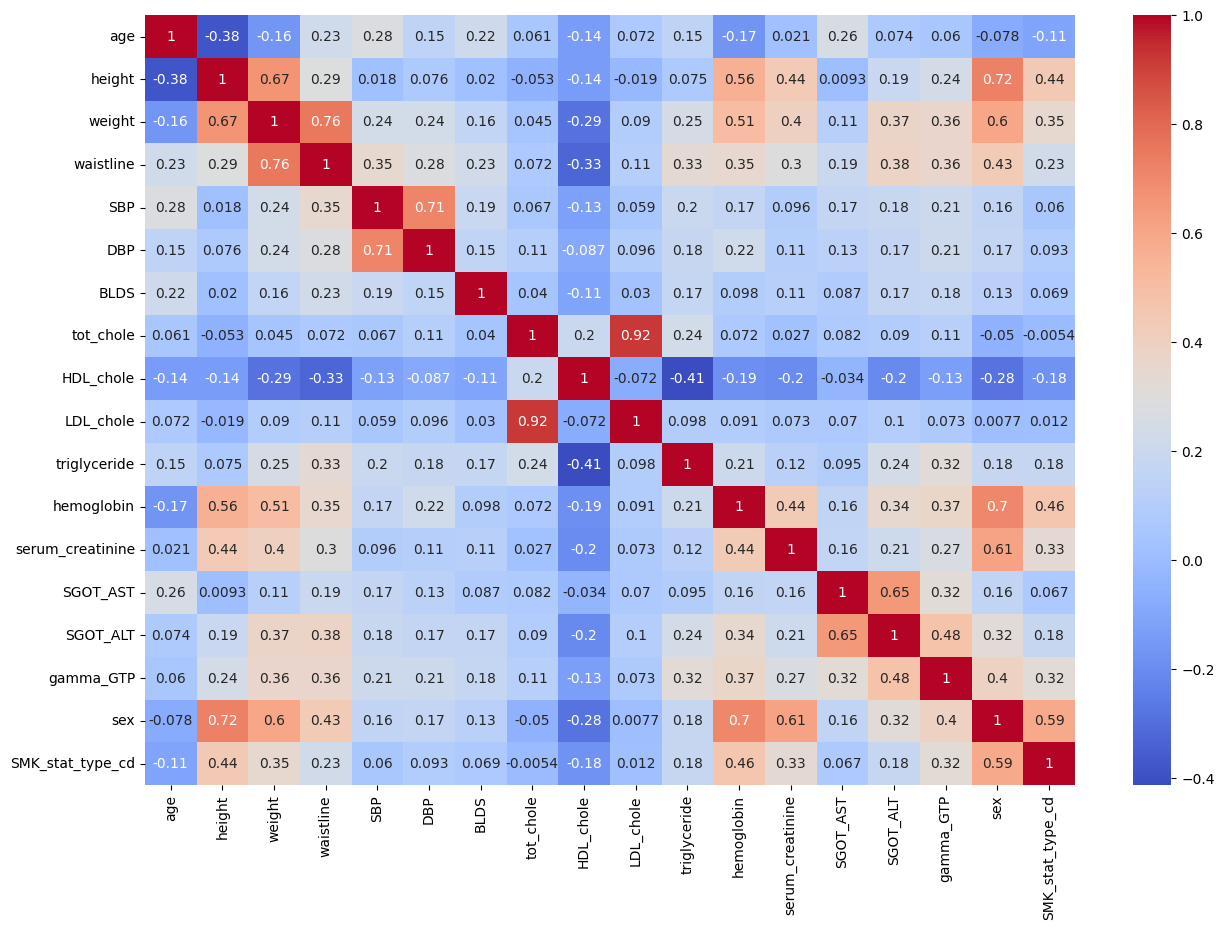

In [9]:
plt.figure(figsize=(15,10))
c= transformed_df.corr()
sns.heatmap(c,cmap="coolwarm",annot=True)

# Ящики с усами (выбросы)

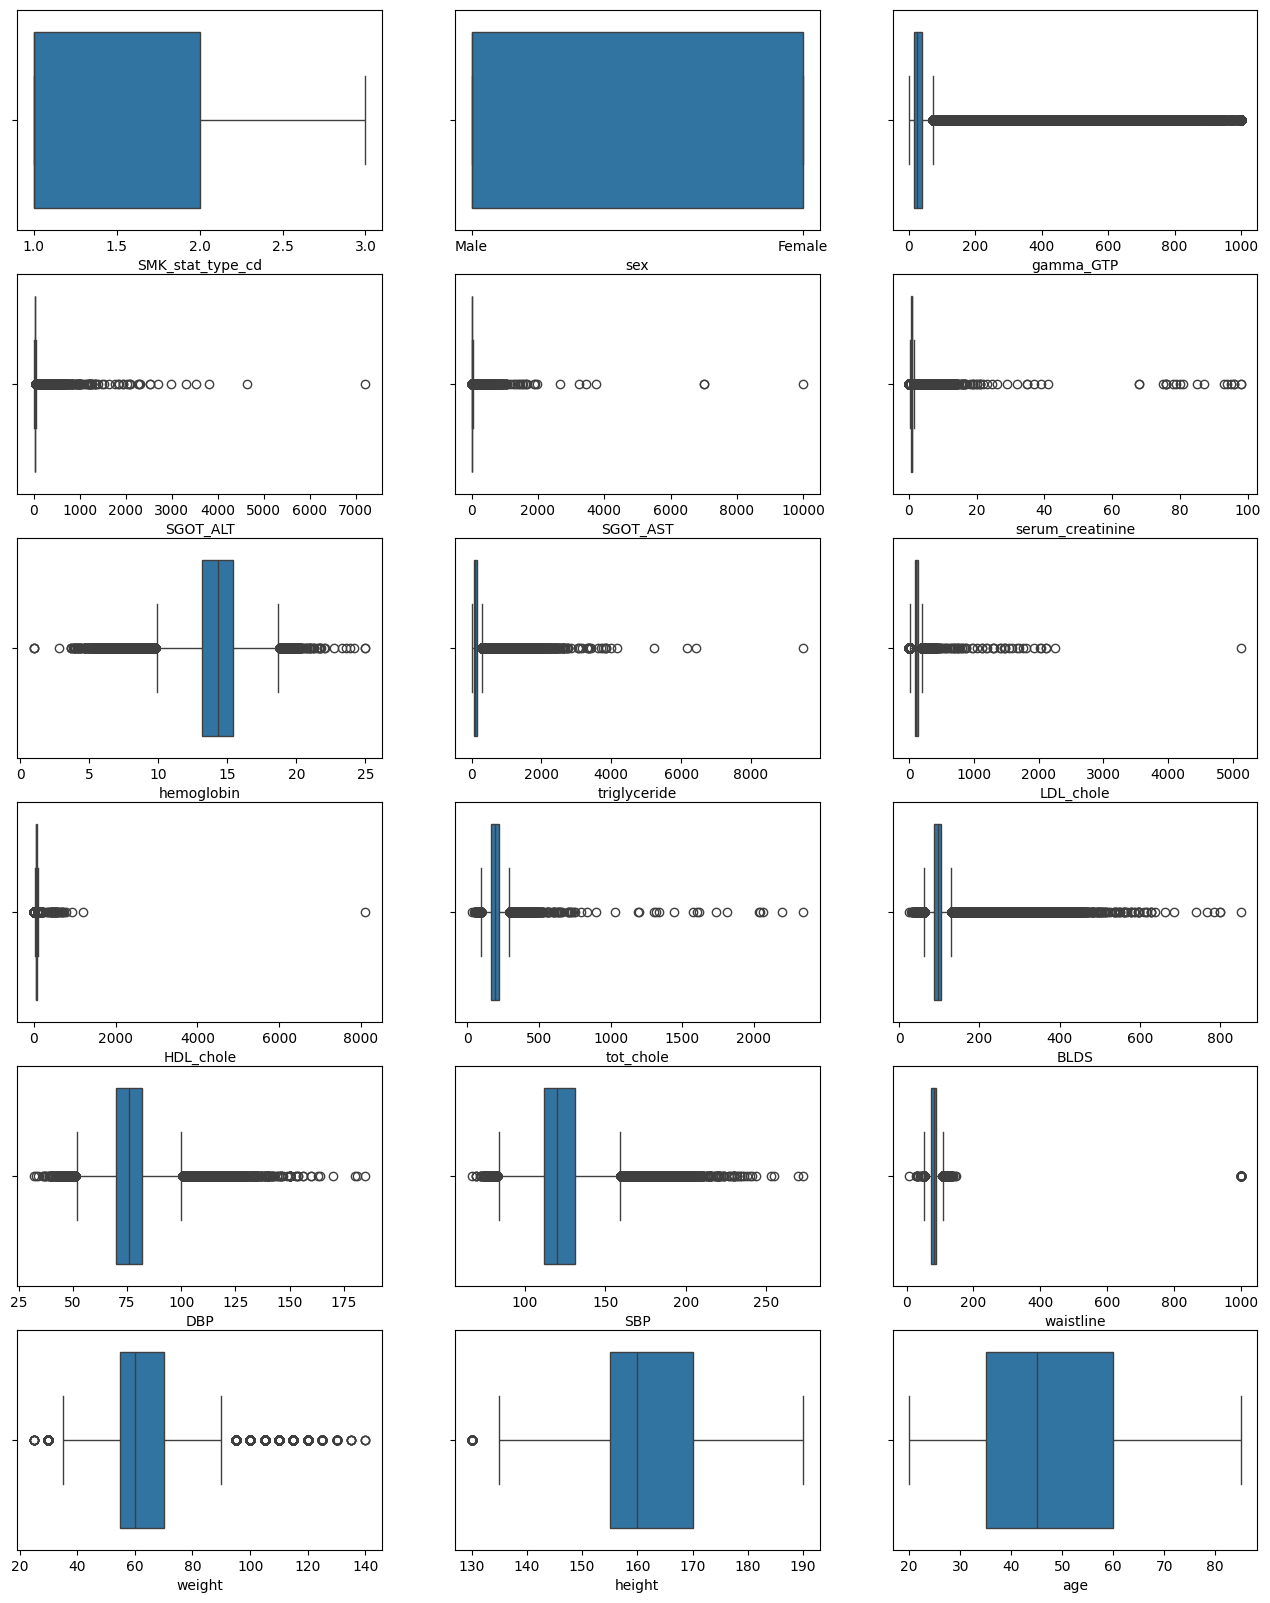

In [10]:
columns = list(transformed_df.columns)
fig, ax = plt.subplots(6, 3, figsize = (16, 20))
for i in range(6):
    k = 3
    for j in range(k):
        sns.boxplot(ax = ax[i,j], x = df[columns.pop()])

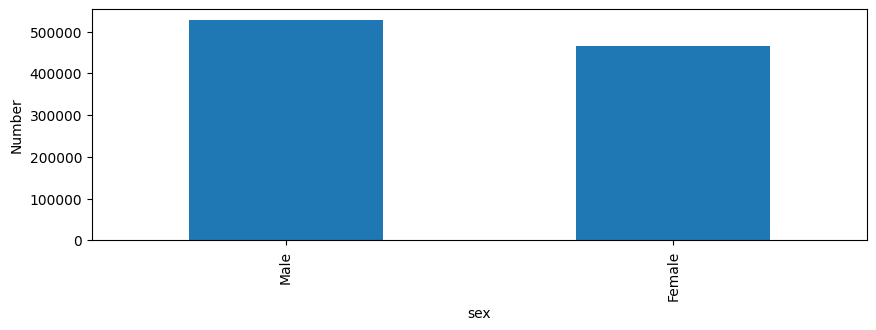

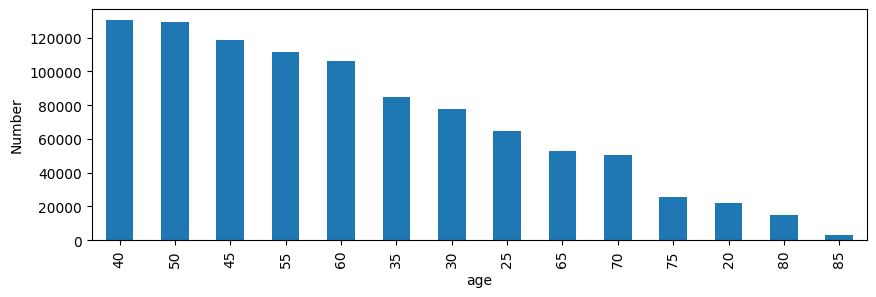

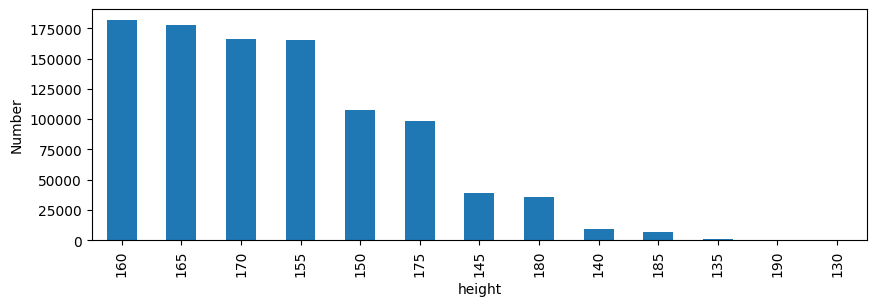

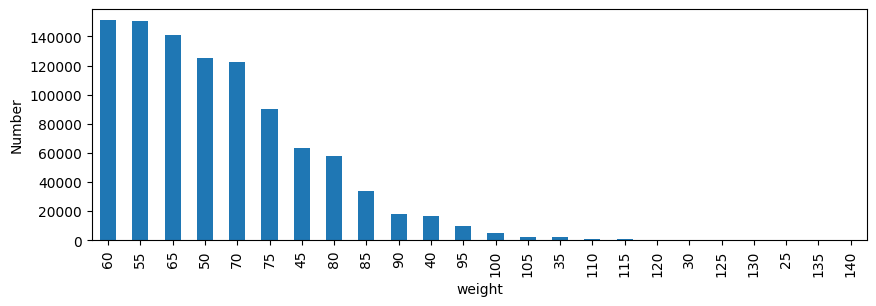

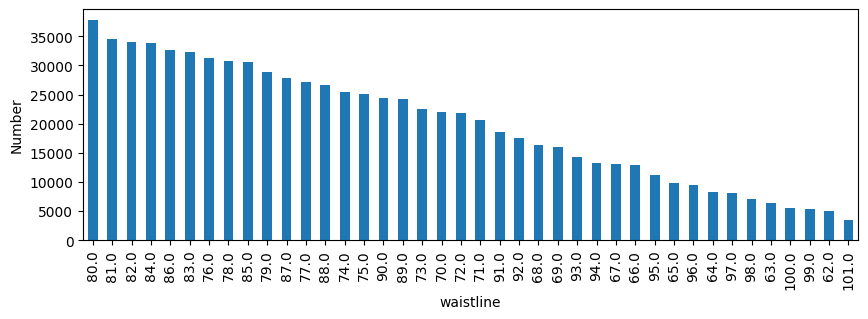

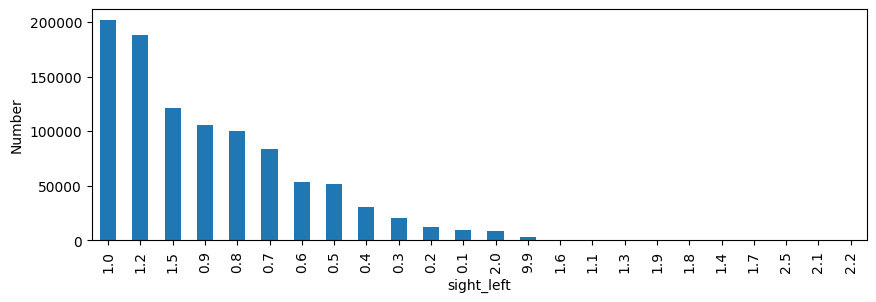

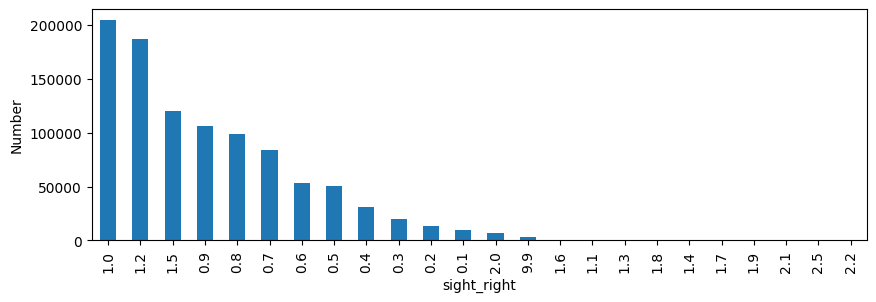

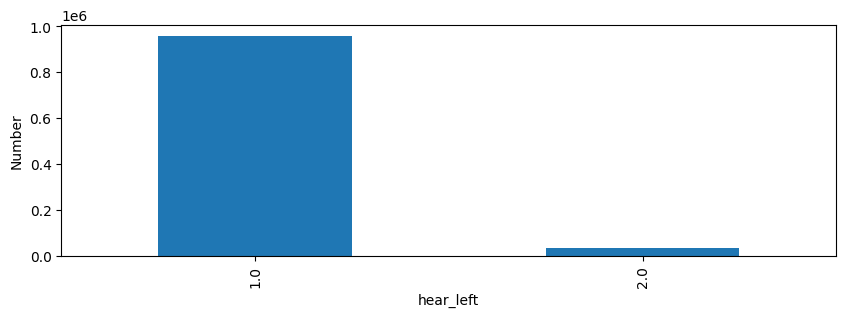

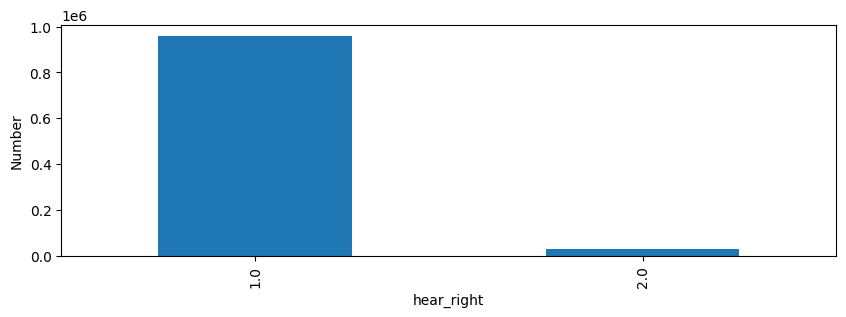

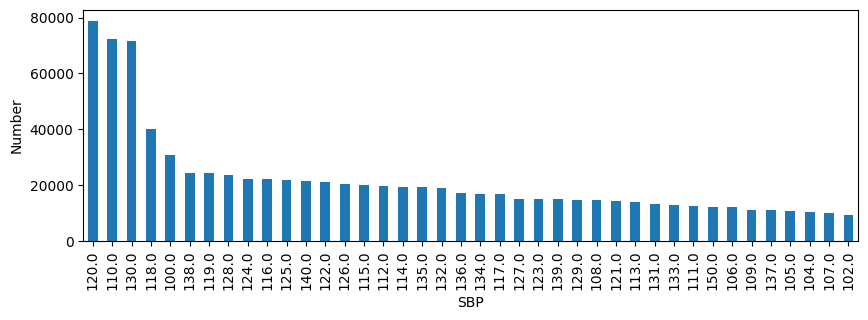

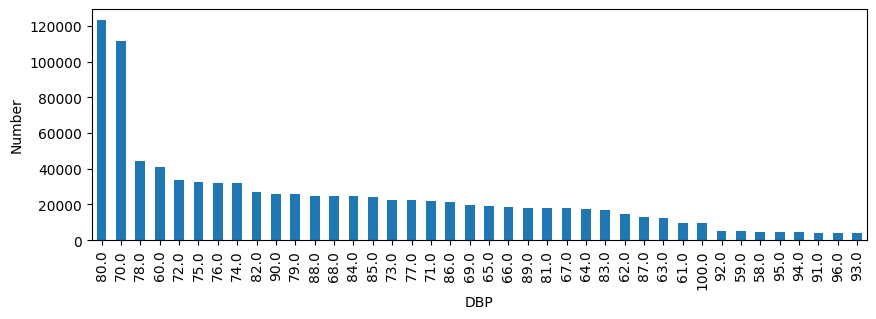

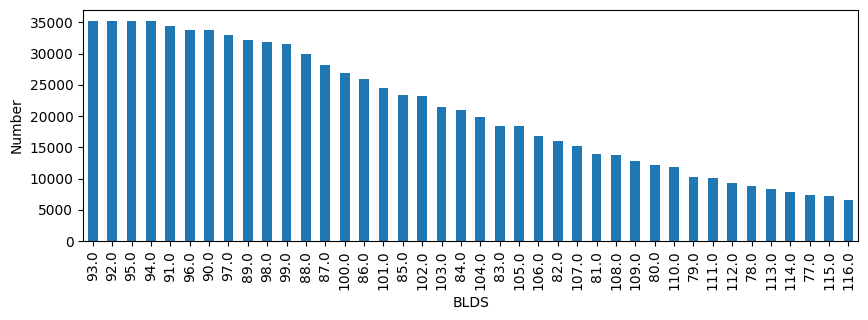

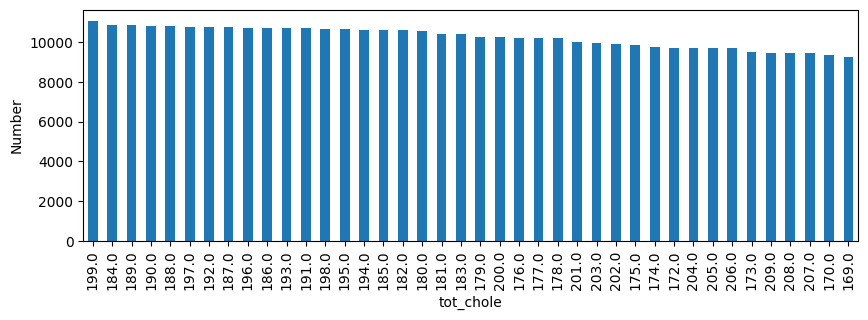

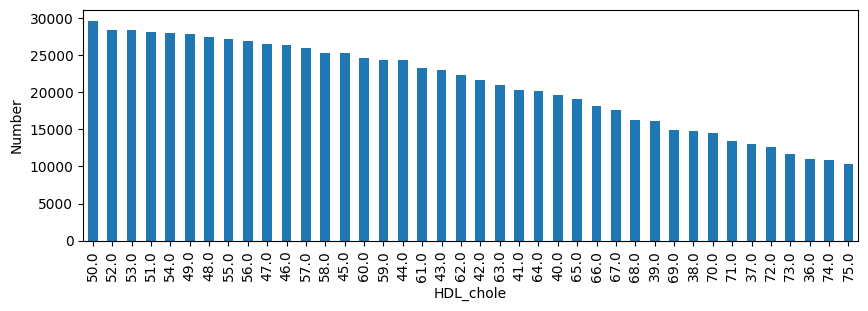

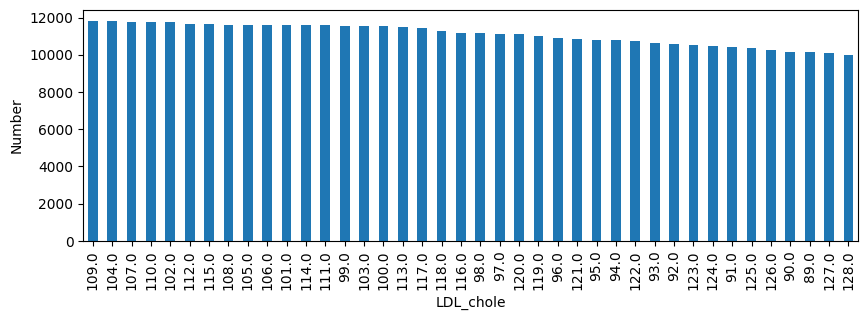

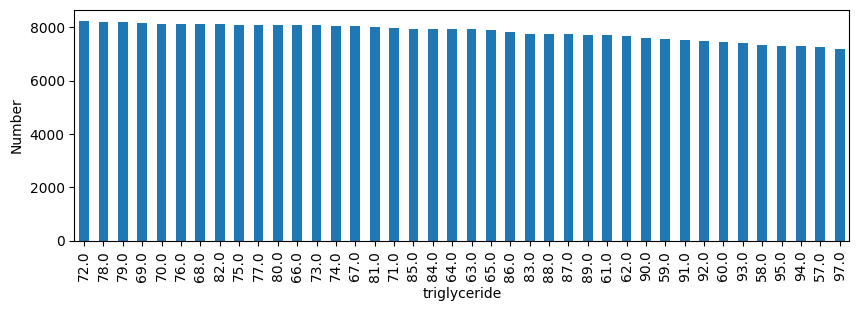

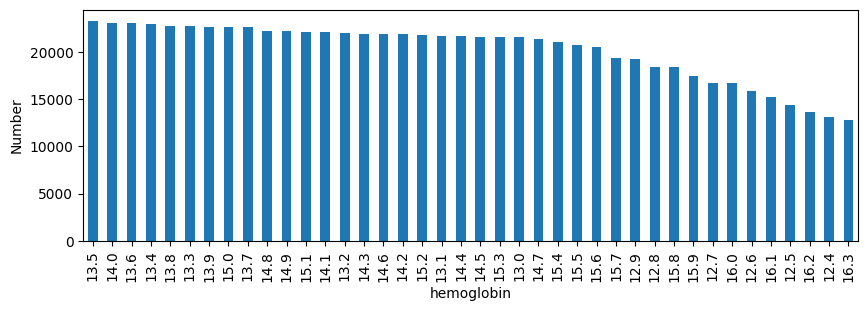

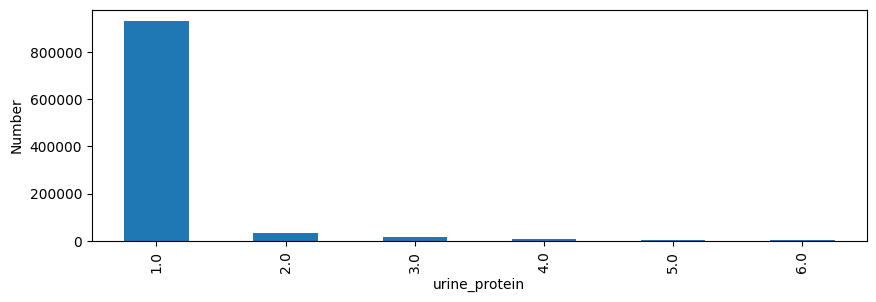

In [11]:
numOfRows = 40
for i in range(0, len(transformed_df.columns)):
    fig, ax = plt.subplots()
    df.iloc[:, i].value_counts().nlargest(40).plot(kind = 'bar', figsize=(10, 3), ax = ax)
    ax.set_ylabel('Number')
    ax.set_xlabel(df.columns[i])

# Визуализация изначального разбиения

<Figure size 1200x1000 with 0 Axes>

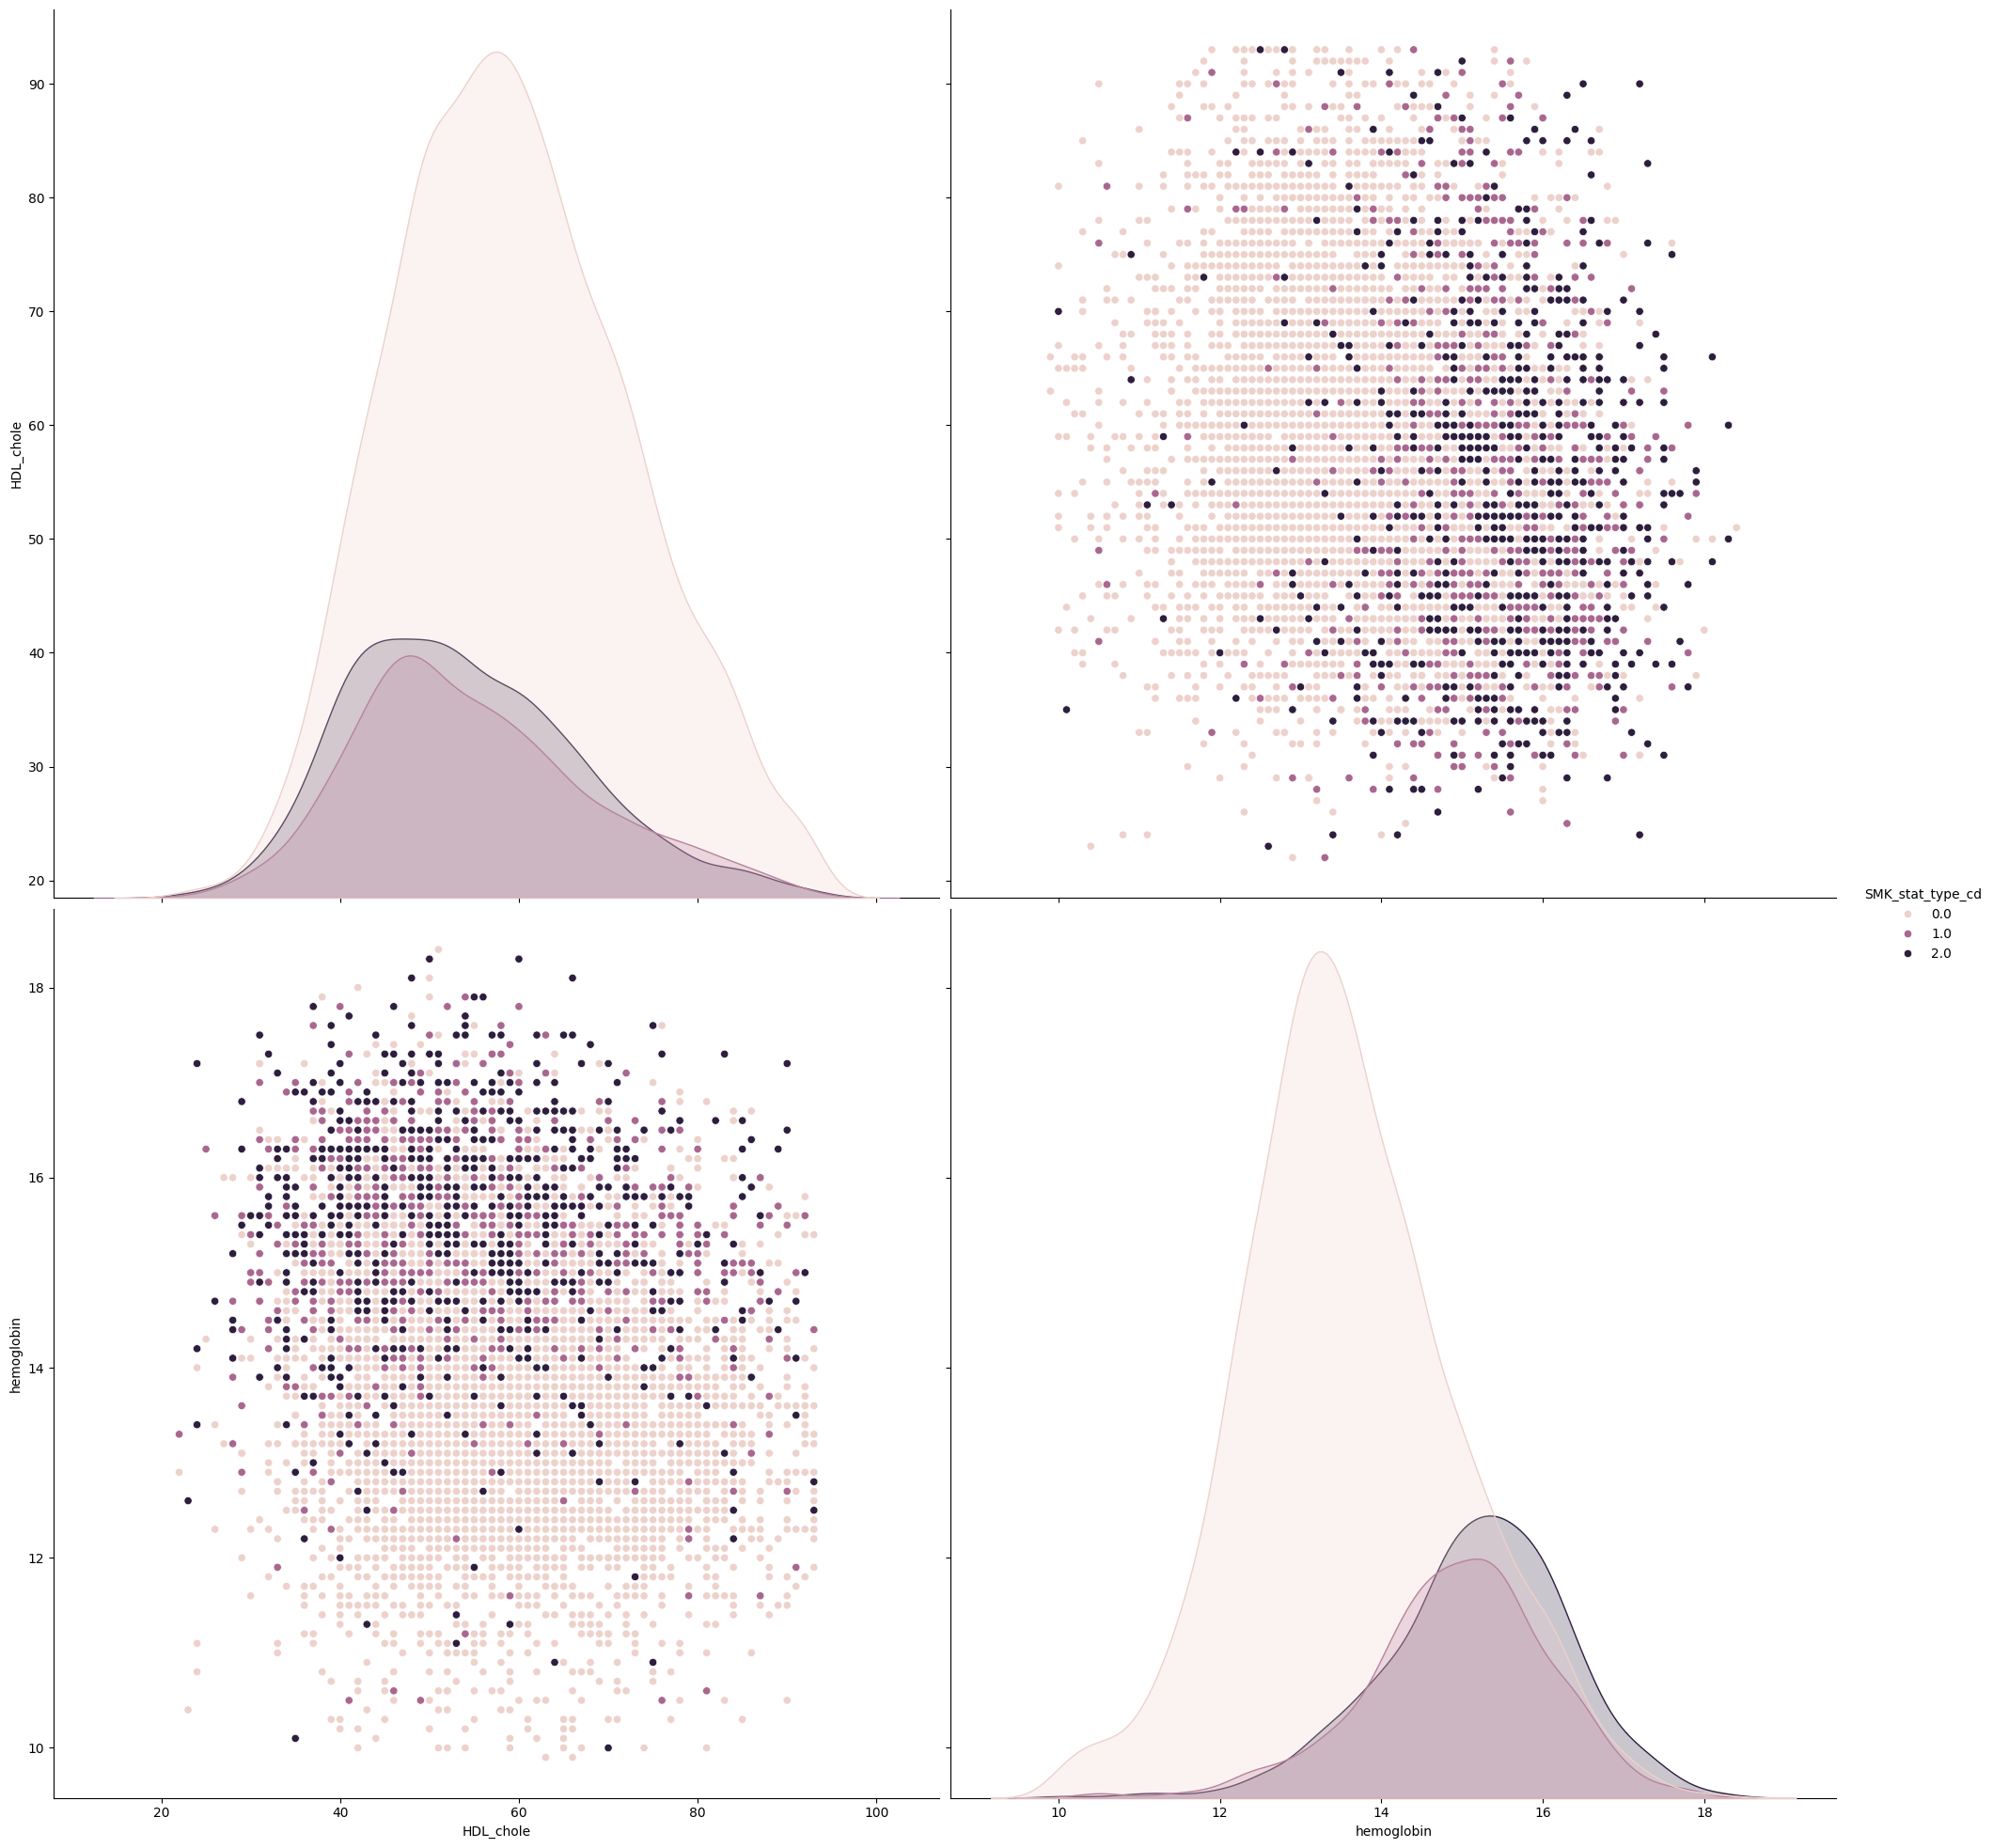

In [12]:
plt.figure(figsize=(12, 10))
sns.pairplot(transformed_df, vars = ['HDL_chole', 'hemoglobin', 
                                     ], hue = "SMK_stat_type_cd", height = 10)

# Разбиение данных

In [13]:
SMK = transformed_df['SMK_stat_type_cd']
transformed_df.drop(['SMK_stat_type_cd'], axis=1, inplace=True)
SMK

0       0.0
1       2.0
3       0.0
4       0.0
5       2.0
       ... 
9993    0.0
9995    0.0
9997    0.0
9998    0.0
9999    0.0
Name: SMK_stat_type_cd, Length: 7203, dtype: float64

# Стандартизация

In [14]:
sc = StandardScaler()
X = sc.fit_transform(transformed_df)
X_kmeans = pd.DataFrame(X, columns=transformed_df.columns)
X_DBSCAN = pd.DataFrame(X, columns=transformed_df.columns)
X_hierarchical = pd.DataFrame(X, columns=transformed_df.columns)
display(X_kmeans)

,age,height,weight,waistline,SBP,DBP,BLDS,tot_chole,HDL_chole,LDL_chole,triglyceride,hemoglobin,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,sex
0,-0.824143,0.893423,1.239848,1.203297,-0.034076,0.568098,0.368188,0.026259,-0.721759,0.427041,-0.330574,2.055997,0.847087,-0.249206,1.638429,1.102757,1.033463
1,-1.172907,1.978363,1.690208,1.090022,0.731044,0.790153,0.995152,1.057082,-0.192454,1.129552,0.215564,1.159105,0.321633,-0.420865,1.749274,0.176059,1.033463
2,0.222147,1.435893,1.690208,1.316573,1.878723,1.345288,0.009923,0.261876,1.395459,-0.275470,-0.066921,2.400955,1.372541,1.124062,1.527583,-0.465501,1.033463
3,0.222147,0.350952,-0.111230,0.070540,1.343140,0.790153,0.547321,0.202971,0.261235,0.139650,-0.104586,-0.220729,-0.203820,-0.592523,-0.911016,0.033490,1.033463
4,0.222147,0.350952,-0.561589,-0.495839,1.649187,1.900423,0.368188,0.762561,1.471074,-0.562861,2.305958,-0.220729,-0.203820,1.124062,2.192656,0.888903,1.033463
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7198,1.965965,-1.818928,-1.011949,-0.156012,0.118948,1.012207,-0.169210,0.821466,-1.099834,1.321146,0.064905,-0.772663,1.897994,2.154012,0.751665,0.318628,-0.967621
7199,-1.172907,2.520833,0.789489,0.070540,-0.263612,0.012963,-1.602271,0.114615,1.546689,-0.147741,-1.159199,1.297088,0.321633,-0.764182,-0.689325,-0.536786,1.033463
7200,0.919675,-0.733988,-1.011949,-0.235305,0.042436,-0.764226,-0.617041,0.114615,-0.268069,-0.754455,2.889761,-0.634680,-1.254728,-0.592523,-0.135098,-0.750639,-0.967621
7201,-0.126616,0.350952,0.339129,-0.257960,-0.187100,-0.764226,-0.706608,2.029002,1.622304,0.810229,2.098802,-1.048630,-0.203820,-0.420865,-0.911016,-0.893208,-0.967621


# Обучение моделей

## Метод локтя

Метод локтя используется для нахождения оптимального количества кластеров при кластеризации методом k-средних. Метод локтя строит график функции стоимости, полученной с помощью различных значений кластеров (k). По мере увеличения числа k функция стоимости уменьшается, это можно определить как переоснащение.

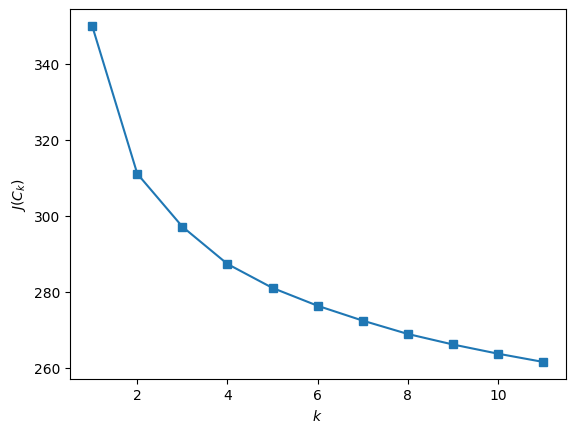

In [15]:
inertia = []
for k in range(1, 12):
    kmeans = KMeans(n_clusters=k, random_state=1, n_init = 10).fit(X_kmeans)
    inertia.append(np.sqrt(kmeans.inertia_))

plt.plot(range(1, 12), inertia, marker="s")
plt.xlabel("$k$")
plt.ylabel("$J(C_k)$");

## K-means

Метод k-средних - Действие алгоритма таково, что он стремится минимизировать суммарное квадратичное отклонение точек кластеров от центров этих кластеров:
$$V = \sum_{i=1}^{k} \sum_{x\in S_i} (x-\mu_i)^2$$
где $k$ - число кластеров, $S_i$ - полученные кластеры, $i=1,2,...,k$, а $\mu_i$ - центры масс всех векторов $x$ из кластера $S_i$

Алгоритм заключается в том, что на каждой итерации заново вычисляется центр масс для каждого кластера, полученного на предыдущем шаге; затем векторы разбиваются на кластеры вновь в соответствии с тем, какой из новых центров оказался ближе по выбранной метрике

In [16]:
k_means = KMeans(n_clusters = 3, n_init = 10)
res_x = k_means.fit(X_kmeans)
labels_kmeans = k_means.labels_
km_res = k_means.predict(X_kmeans)
print(labels_kmeans)

[0 0 0 ... 1 1 0]


<Axes: xlabel='hemoglobin', ylabel='HDL_chole'>

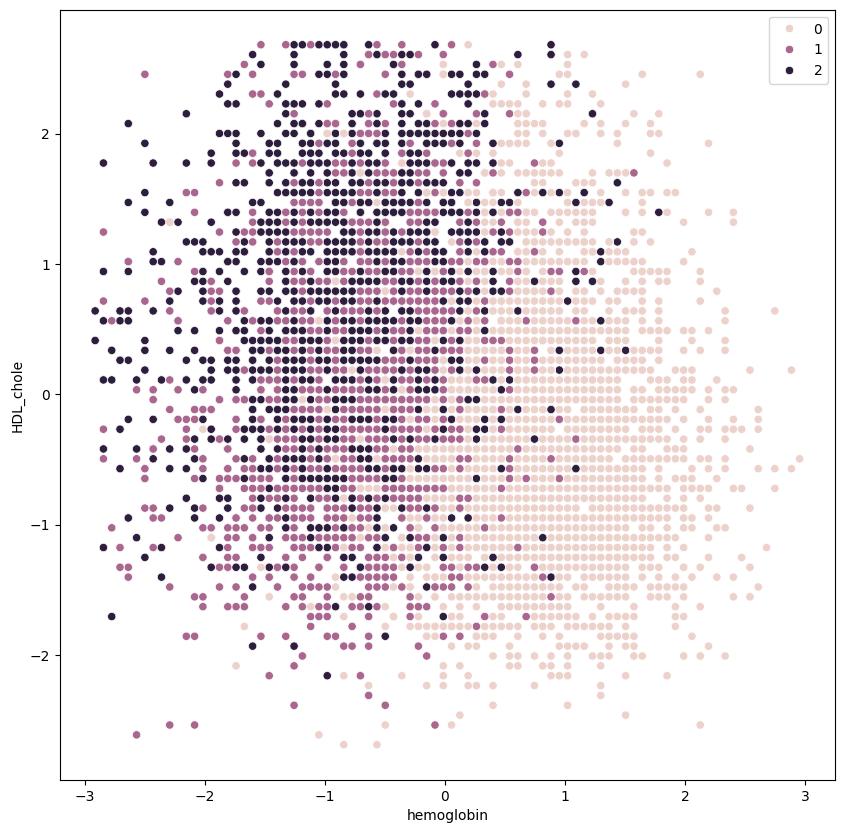

In [17]:
plt.figure(figsize=(10, 10))
sns.scatterplot(data = X_kmeans, x = 'hemoglobin', y = 'HDL_chole', hue = labels_kmeans)

In [18]:
print('KMeans:')
print("Rand score: %0.3f" % metrics.rand_score(SMK, km_res))
print("Silhouette Coefficient: %0.3f" % silhouette_score(X_kmeans, k_means.labels_))

KMeans:
Rand score: 0.552
Silhouette Coefficient: 0.147


Индекс Rand оценивает, насколько много из тех пар элементов, которые находились в одном классе, и тех пар элементов, которые находились в разных классах, сохранили это состояние после кластеризации алгоритмом. 

Коэффициент силуэта в кластеризации — это величина, которая позволяет оценить степень соответствия построенной кластерной структуры обучающим данным, т. е. оценить качество кластеризации.

# DBSCAN

Это алгоритм кластеризации, основанн на плотности — если дан набор точек в некотором пространстве, алгоритм группирует вместе точки, которые тесно расположены (точки со многими близкими соседями), помечая как выбросы точки, которые находятся одиноко в областях с малой плотностью (ближайшие соседи которых лежат далеко).

In [19]:
dbscan = DBSCAN(eps=3.64, min_samples=19).fit(X_DBSCAN)
labels = dbscan.labels_
dbscan_res = dbscan.fit_predict(X_DBSCAN)
labels

array([0, 0, 0, ..., 0, 0, 0])

<Axes: xlabel='hemoglobin', ylabel='HDL_chole'>

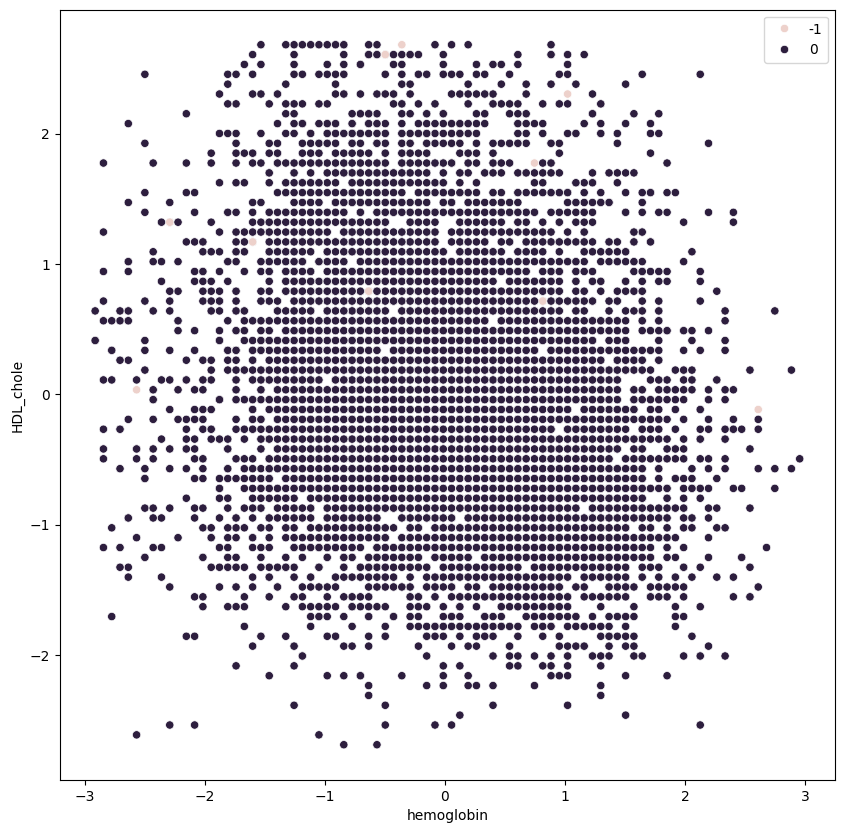

In [20]:
plt.figure(figsize=(10, 10))
sns.scatterplot(data = X_DBSCAN, x = 'hemoglobin', y = 'HDL_chole', hue = dbscan.labels_)

In [21]:
print('DBSCAN:')
print("Rand score: %0.3f" % metrics.rand_score(SMK, dbscan_res))
print("Silhouette Coefficient: %0.3f" % silhouette_score(X_DBSCAN, dbscan_res))

DBSCAN:
Rand score: 0.479
Silhouette Coefficient: 0.249


# Иерархическая кластеризация

Под дендрограммой обычно понимается дерево, построенное по матрице мер близости. Дендрограмма позволяет изобразить взаимные связи между объектами из заданного множества. Для создания дендрограммы требуется матрица сходства (или различия), которая определяет уровень сходства между парами кластеров.
Для построения матрицы сходства (различия) необходимо задать меру расстояния между двумя кластерами.
В моем случае используется метод Уорда - В отличие от других методов кластерного анализа, для оценки расстояний между кластерами здесь используются методы дисперсионного анализа. В качестве расстояния между кластерами берётся прирост суммы квадратов расстояний объектов до центра кластера, получаемого в результате их объединения:
$$\Delta=\sum_{i}(x_i-\overline{x})^2-\sum_{x_i \in A}(x_i-\overline{a})^2-\sum_{x_i \in B}(x_i-\overline{b})^2$$
На каждом шаге алгоритма объединяются такие два кластера, которые приводят к минимальному увеличению дисперсии. Этот метод применяется для задач с близко расположенными кластерами.

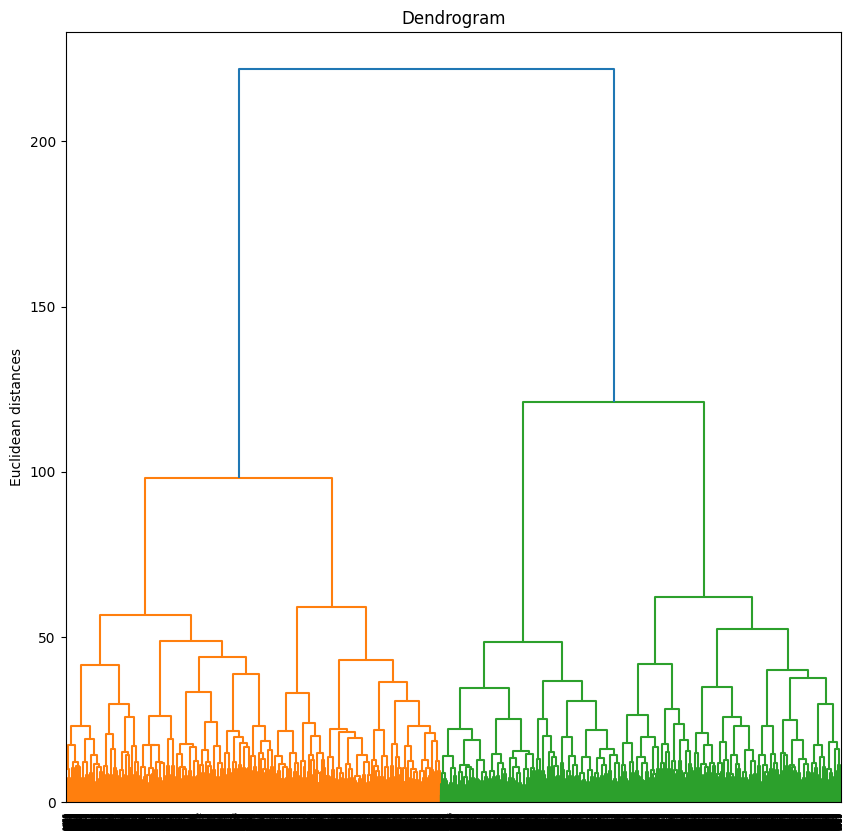

In [22]:
plt.figure(figsize=(10, 10))
dendrogram = sch.dendrogram(sch.linkage(X_hierarchical, method = 'ward'))
plt.title('Dendrogram')
plt.ylabel('Euclidean distances')
plt.show()

In [23]:
ag = AgglomerativeClustering()
ag_res = ag.fit_predict(X_hierarchical)
print(set(ag.labels_))

{0, 1}


In [24]:
print('Иерархическая кластеризация:')

print("Rand score: %0.3f" % metrics.rand_score(SMK, ag_res))
print("Silhouette Coefficient: %0.3f" % silhouette_score(X_hierarchical, ag_res))

Иерархическая кластеризация:
Rand score: 0.644
Silhouette Coefficient: 0.189
